In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_df = pd.read_csv("departamentos-en-venta-2020.csv")
data_df.head()

,Direccion,PropiedadS,Dolares,Pesos,DolaresM2,PesosM2,Ambientes,Cotizacion,Trimestre,Barrio,Comunas
0,Pje Cnel J F Bogado 4561,17,54900,3513600,3229,206682,1,64,SEGUNDO,ALMAGRO,5
1,BOGADO 4500,18,53000,3392000,2944,188444,1,64,SEGUNDO,ALMAGRO,5
2,Pte H Yrigoyen 3381,25,45000,2880000,2500,160000,1,64,SEGUNDO,ALMAGRO,5
3,PASAJE BOGADO 4500,18,41000,2624000,2278,145778,1,64,SEGUNDO,ALMAGRO,5
4,Estado de Palestina 500,18,58900,3769600,3272,209422,1,64,SEGUNDO,ALMAGRO,5


In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156258 entries, 0 to 156257
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Direccion   156258 non-null  object
 1   PropiedadS  156258 non-null  int64 
 2   Dolares     156258 non-null  int64 
 3   Pesos       156258 non-null  int64 
 4   DolaresM2   156258 non-null  int64 
 5   PesosM2     156258 non-null  int64 
 6   Ambientes   156258 non-null  int64 
 7   Cotizacion  156258 non-null  int64 
 8   Trimestre   156258 non-null  object
 9   Barrio      156248 non-null  object
 10  Comunas     156258 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 13.1+ MB


In [4]:
data_df.describe()

,PropiedadS,Dolares,Pesos,DolaresM2,PesosM2,Ambientes,Cotizacion,Comunas
count,156258.000000,1.562580e+05,1.562580e+05,156258.000000,1.562580e+05,156258.000000,156258.000000,156258.000000
mean,74.179652,2.139471e+05,1.438505e+07,2913.109473,1.951831e+05,2.536337,67.200009,8.665912
std,85.214643,2.387804e+05,1.636017e+07,1077.613671,7.260647e+04,1.114281,3.558606,4.849992
min,11.000000,7.200000e+03,4.392000e+05,147.000000,9.205000e+03,-7.000000,61.000000,0.000000
25%,41.000000,1.070000e+05,7.089000e+06,2250.000000,1.506300e+05,2.000000,64.000000,4.000000
50%,58.000000,1.500000e+05,1.007750e+07,2757.000000,1.845420e+05,2.000000,67.000000,10.000000
75%,85.000000,2.350000e+05,1.593600e+07,3375.000000,2.254550e+05,3.000000,70.000000,13.000000
max,17180.000000,1.700000e+07,1.088000e+09,72917.000000,4.721354e+06,8.000000,82.000000,15.000000


## Limpieza de Datos

In [5]:
data_df.isna().sum()

Direccion      0
PropiedadS     0
Dolares        0
Pesos          0
DolaresM2      0
PesosM2        0
Ambientes      0
Cotizacion     0
Trimestre      0
Barrio        10
Comunas        0
dtype: int64

In [6]:
data_df.dropna(inplace=True)

In [7]:
data_df.drop_duplicates(inplace=True)

### Barrio

In [8]:
data_df['Barrio'].unique()

array(['ALMAGRO', 'CABALLITO', 'RECOLETA', 'VILLA CRESPO', 'BALVANERA',
       'CONSTITUCION', 'PARQUE PATRICIOS', 'SAN CRISTOBAL', 'MONTSERRAT',
       'SAN NICOLAS', 'BOEDO', 'RETIRO', 'SAN TELMO', 'BELGRANO',
       'COGHLAN', 'NUÑEZ', 'COLEGIALES', 'SAAVEDRA', 'PALERMO',
       'AGRONOMIA', 'VILLA PUEYRREDON', 'CHACARITA', 'PARQUE CHACABUCO',
       'FLORES NORTE', 'PARQUE CHAS', 'PATERNAL', 'VILLA DEL PARQUE',
       'VILLA DEVOTO NORTE', 'VILLA DEVOTO SUR', 'VILLA ORTUZAR',
       'VILLA URQUIZA', 'BOCA', 'BARRACAS ESTE', 'FLORES SUR', 'FLORESTA',
       'VILLA SANTA RITA', 'LINIERS', 'MATADEROS', 'MONTE CASTRO',
       'NUEVA POMPEYA', 'VELEZ SARSFIELD', 'VERSALLES',
       'VILLA GRAL. MITRE', 'VILLA LURO', 'VILLA REAL',
       'PARQUE AVELLANEDA', 'VILLA LUGANO', 'BARRACAS OESTE',
       'PUERTO MADERO', 'VILLA RIACHUELO', 'VILLA SOLDATI', 'NU?æEZ'],
      dtype=object)

In [9]:
data_df.loc[data_df['Barrio'] == 'NU?æEZ'] = 'NUÑEZ'

### Ambientes

In [10]:
data_df['Ambientes'].unique()

array([1, 2, 3, 4, -7, 5, 7, 6, 8, 'NUÑEZ', 0], dtype=object)

In [11]:
data_df.drop(data_df[data_df['Ambientes'] == -7].index, inplace=True)
data_df.drop(data_df[data_df['Ambientes'] == 0].index, inplace=True)
data_df.drop(data_df[data_df['Ambientes'] == 'NUÑEZ'].index, inplace=True)

In [12]:
data_df['Ambientes'].unique()

array([1, 2, 3, 4, 5, 7, 6, 8], dtype=object)

### Trimestre

In [13]:
data_df['Trimestre'].unique()

array(['SEGUNDO', 'PRIMER', 'TERCER', 'CUARTO'], dtype=object)

In [14]:
data_df['Trimestre'].value_counts()

SEGUNDO    135718
PRIMER      11917
TERCER       3150
CUARTO       2697
Name: Trimestre, dtype: int64

### Comunas

In [15]:
data_df['Comunas'].unique()

array([5, 6, 2, 15, 3, 1, 4, 13, 12, 14, 7, 11, 10, 9, 8], dtype=object)

### Elimino columnas innecesarias o que no conozco el significado

In [16]:
to_drop = ['Direccion','PropiedadS','Cotizacion']

In [17]:
data_df.drop(to_drop, axis=1, inplace=True)

In [18]:
data_df = data_df.reindex(columns=['Barrio','Comunas','Ambientes','Trimestre','Pesos','Dolares','PesosM2', 'DolaresM2'])

### Exporto el dataset limpio

In [19]:
ruta = 'C:/Users/Tamara/Documents/DATA ANALYTICS/Proyectos/Departamentos en Venta/departamentos-en-venta-2020-clean.csv'

data_df.to_csv(ruta, index=False)

In [20]:
data = pd.read_csv("departamentos-en-venta-2020-clean.csv")
data.head()

,Barrio,Comunas,Ambientes,Trimestre,Pesos,Dolares,PesosM2,DolaresM2
0,ALMAGRO,5,1,SEGUNDO,3513600,54900,206682,3229
1,ALMAGRO,5,1,SEGUNDO,3392000,53000,188444,2944
2,ALMAGRO,5,1,SEGUNDO,2880000,45000,160000,2500
3,ALMAGRO,5,1,SEGUNDO,2624000,41000,145778,2278
4,ALMAGRO,5,1,SEGUNDO,3769600,58900,209422,3272


## Distribución de frecuencias

### Barrio

Cantidad de departamentos por barrio

In [66]:
data['Barrio'].value_counts()

PALERMO               21662
CABALLITO             11343
BELGRANO              11171
RECOLETA              11125
ALMAGRO                8471
BALVANERA              7823
VILLA CRESPO           7091
VILLA URQUIZA          6417
FLORES NORTE           6076
COLEGIALES             3814
SAAVEDRA               3597
SAN NICOLAS            3313
LINIERS                2782
MONTSERRAT             2743
PARQUE CHACABUCO       2678
RETIRO                 2640
CONSTITUCION           2479
SAN CRISTOBAL          2303
BARRACAS ESTE          2179
VILLA LURO             1958
VILLA DEL PARQUE       1954
SAN TELMO              1798
NUÑEZ                  1754
CHACARITA              1698
VILLA DEVOTO NORTE     1633
MONTE CASTRO           1623
BOEDO                  1594
PUERTO MADERO          1497
FLORESTA               1371
VILLA SANTA RITA       1358
COGHLAN                1349
VILLA ORTUZAR          1326
VELEZ SARSFIELD        1308
VILLA GRAL. MITRE      1277
VILLA PUEYRREDON       1253
MATADEROS           

In [21]:
total_count_barrio = data['Barrio'].value_counts().sum()

Porcentaje del total de departamentos por cada barrio

In [22]:
porcentaje_barrio = data['Barrio'].value_counts()/total_count_barrio*100 

In [23]:
porcentaje_barrio

PALERMO               14.113707
CABALLITO              7.390443
BELGRANO               7.278378
RECOLETA               7.248407
ALMAGRO                5.519214
BALVANERA              5.097015
VILLA CRESPO           4.620086
VILLA URQUIZA          4.180946
FLORES NORTE           3.958770
COLEGIALES             2.484982
SAAVEDRA               2.343597
SAN NICOLAS            2.158559
LINIERS                1.812590
MONTSERRAT             1.787180
PARQUE CHACABUCO       1.744830
RETIRO                 1.720071
CONSTITUCION           1.615173
SAN CRISTOBAL          1.500502
BARRACAS ESTE          1.419710
VILLA LURO             1.275720
VILLA DEL PARQUE       1.273113
SAN TELMO              1.171473
NUÑEZ                  1.142805
CHACARITA              1.106319
VILLA DEVOTO NORTE     1.063968
MONTE CASTRO           1.057453
BOEDO                  1.038558
PUERTO MADERO          0.975359
FLORESTA               0.893264
VILLA SANTA RITA       0.884794
COGHLAN                0.878930
VILLA OR

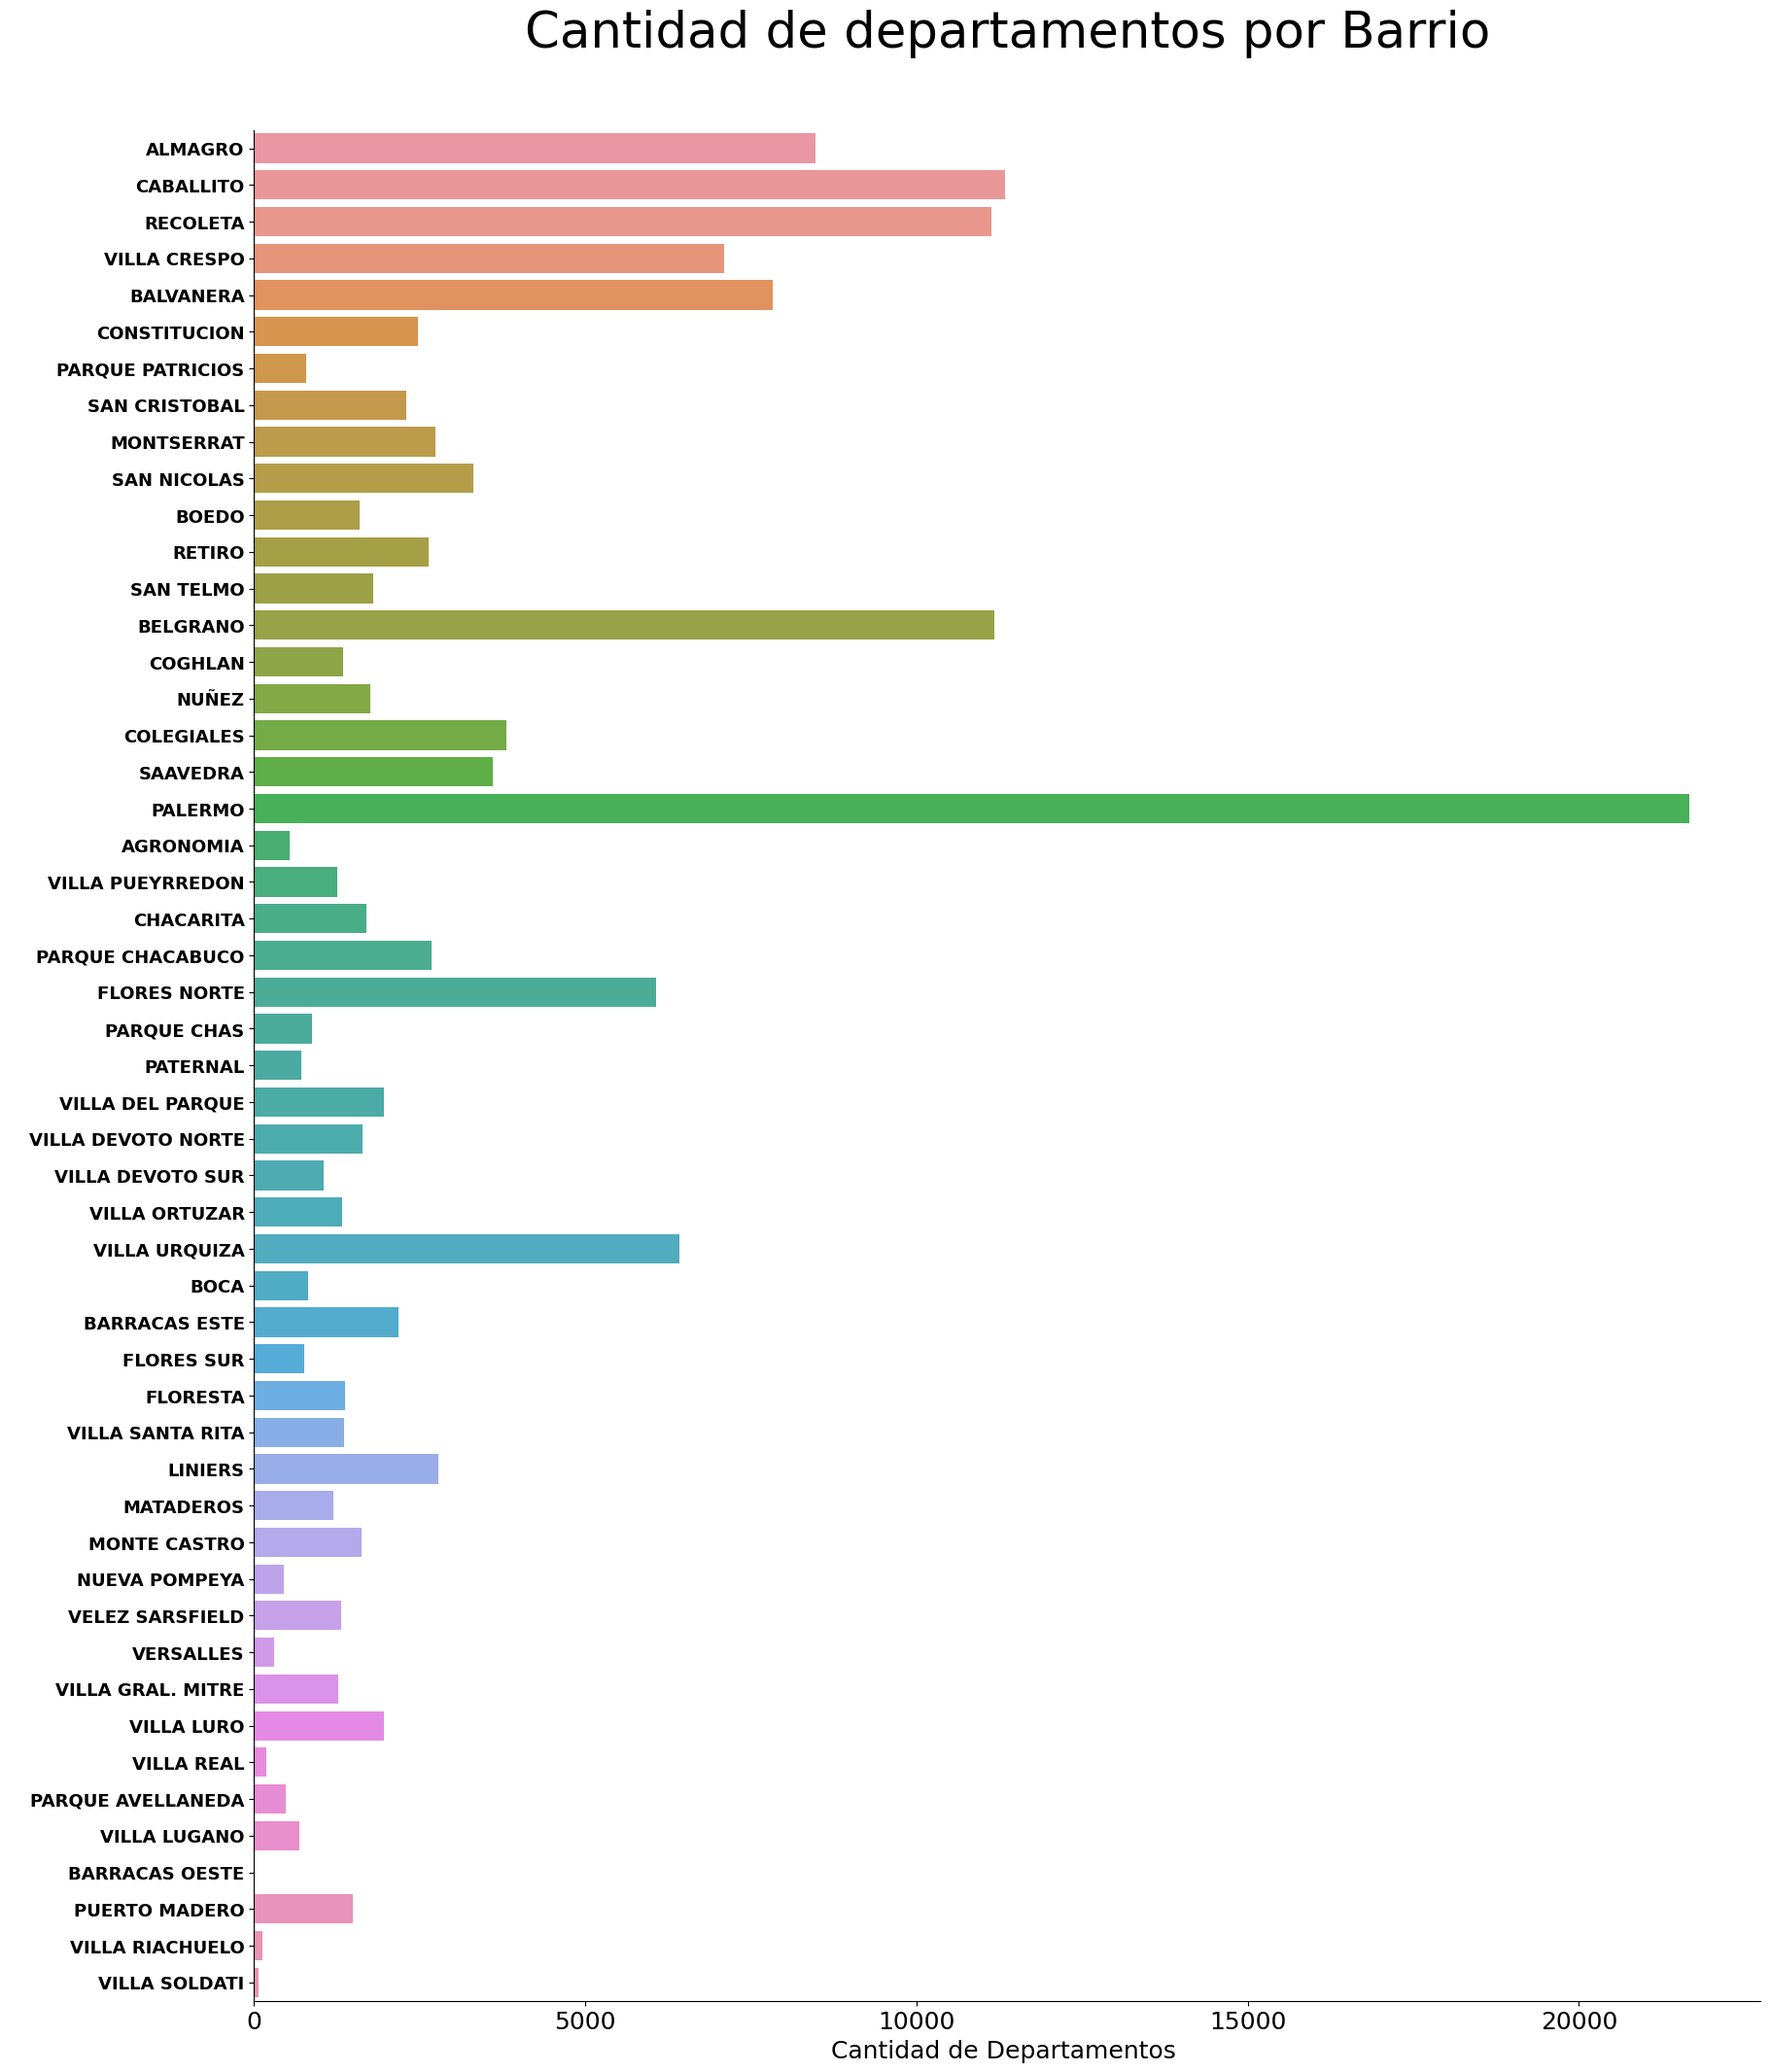

In [24]:
plt.figure(figsize=(20,25))

sns.countplot(
    y = 'Barrio',
    data = data,
    )


plt.title('Cantidad de departamentos por Barrio', y=1.04, fontdict={'size':37})
plt.ylabel(' ')
plt.yticks(fontsize=13, weight='bold')
plt.xlabel('Cantidad de Departamentos ' , fontdict={'size':18})
plt.xticks(fontsize=18)


sns.despine()
plt.show()

## Observaciones:
- Podemos ver que el Barrio con mayor cantidad de departamentos en venta es Palermo, seguido de Caballito, Belgrano y Recoleta.
- El barrio de Palermo tiene 21662 departamentos en venta (14%)
- Barrios como Barracas Oeste, Villa Soldati y Villa Riachuelo poseen la menor cantidad de unidades a la venta. 
- El barrio de Barracas Oeste tiene solo 4 departamentos a la venta (0.002%)

### Comunas

In [67]:
data['Comunas'].value_counts()

14    21662
13    16739
1     14470
12    12616
15    12242
6     11343
2     11125
3     10126
5     10065
7      9509
11     7279
10     6738
9      4468
4      4229
8       871
Name: Comunas, dtype: int64

In [25]:
total_count_comunas = data['Comunas'].value_counts().sum()

In [26]:
porcentaje_comunas = data['Comunas'].value_counts()/total_count_comunas*100 

In [27]:
porcentaje_comunas

14    14.113707
13    10.906165
1      9.427816
12     8.219856
15     7.976180
6      7.390443
2      7.248407
3      6.597516
5      6.557772
7      6.195515
11     4.742576
10     4.390091
9      2.911091
4      2.755372
8      0.567493
Name: Comunas, dtype: float64

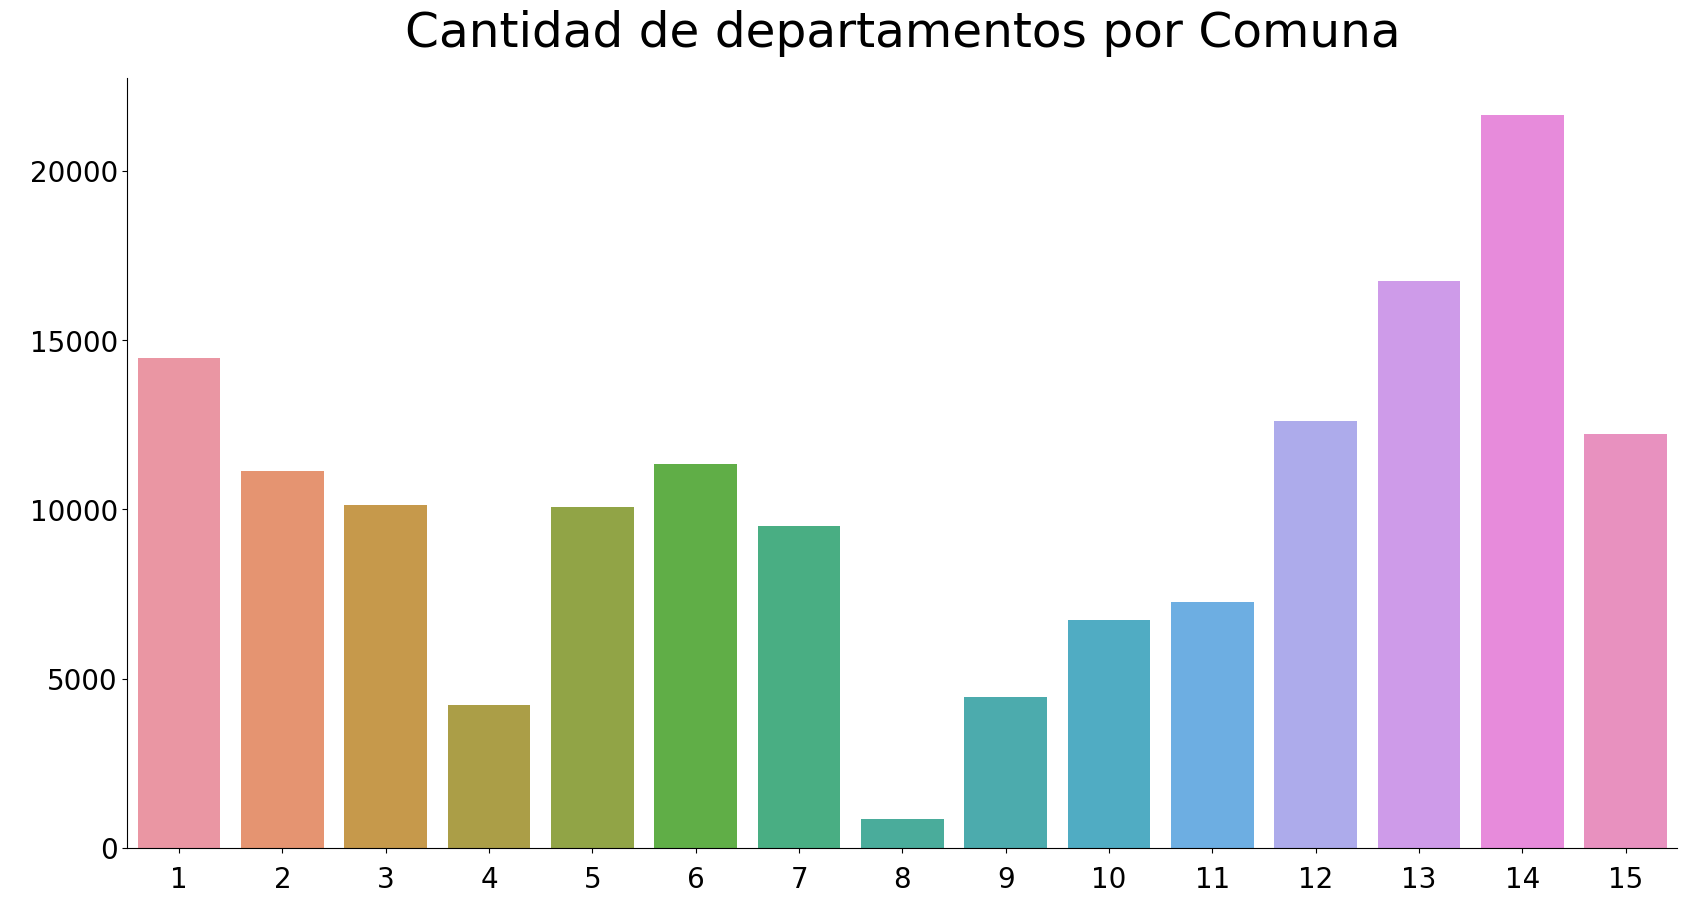

In [28]:
plt.figure(figsize=(20,10))

sns.countplot(x = 'Comunas',
           data = data)


plt.title('Cantidad de departamentos por Comuna', y=1.03, fontdict={'size':35})
plt.xlabel(' ')
plt.xticks(fontsize=20, y=-0.01)
plt.ylabel(' ')
plt.yticks(fontsize=20)

sns.despine()
plt.show()

## Observaciones:
- La comuna 14 es la que tiene mayor cantidad de departamentos en venta (corresponde al Barrio de Palermo).
- Le sigue la comuna 13 la cual esta integrada por los barrios de Núñez, Belgrano y Colegiales con 16739 departamentos a la venta (10%)
- En tercer lugar la comuna 1 integrada por los barrios de Retiro, San Nicolás, Puerto Madero, San Telmo, Montserrat y Constitución con 14470 (9,42%)

### Ambientes

In [68]:
data['Ambientes'].value_counts()

2    50384
3    43164
1    29232
4    24824
5     4791
6      809
7      236
8       42
Name: Ambientes, dtype: int64

In [29]:
total_count_ambientes = data['Ambientes'].value_counts().sum()

In [30]:
porcentaje_ambientes = data['Ambientes'].value_counts()/total_count_ambientes*100 

In [31]:
porcentaje_ambientes

2    32.827302
3    28.123168
1    19.045882
4    16.173884
5     3.121539
6     0.527098
7     0.153764
8     0.027365
Name: Ambientes, dtype: float64

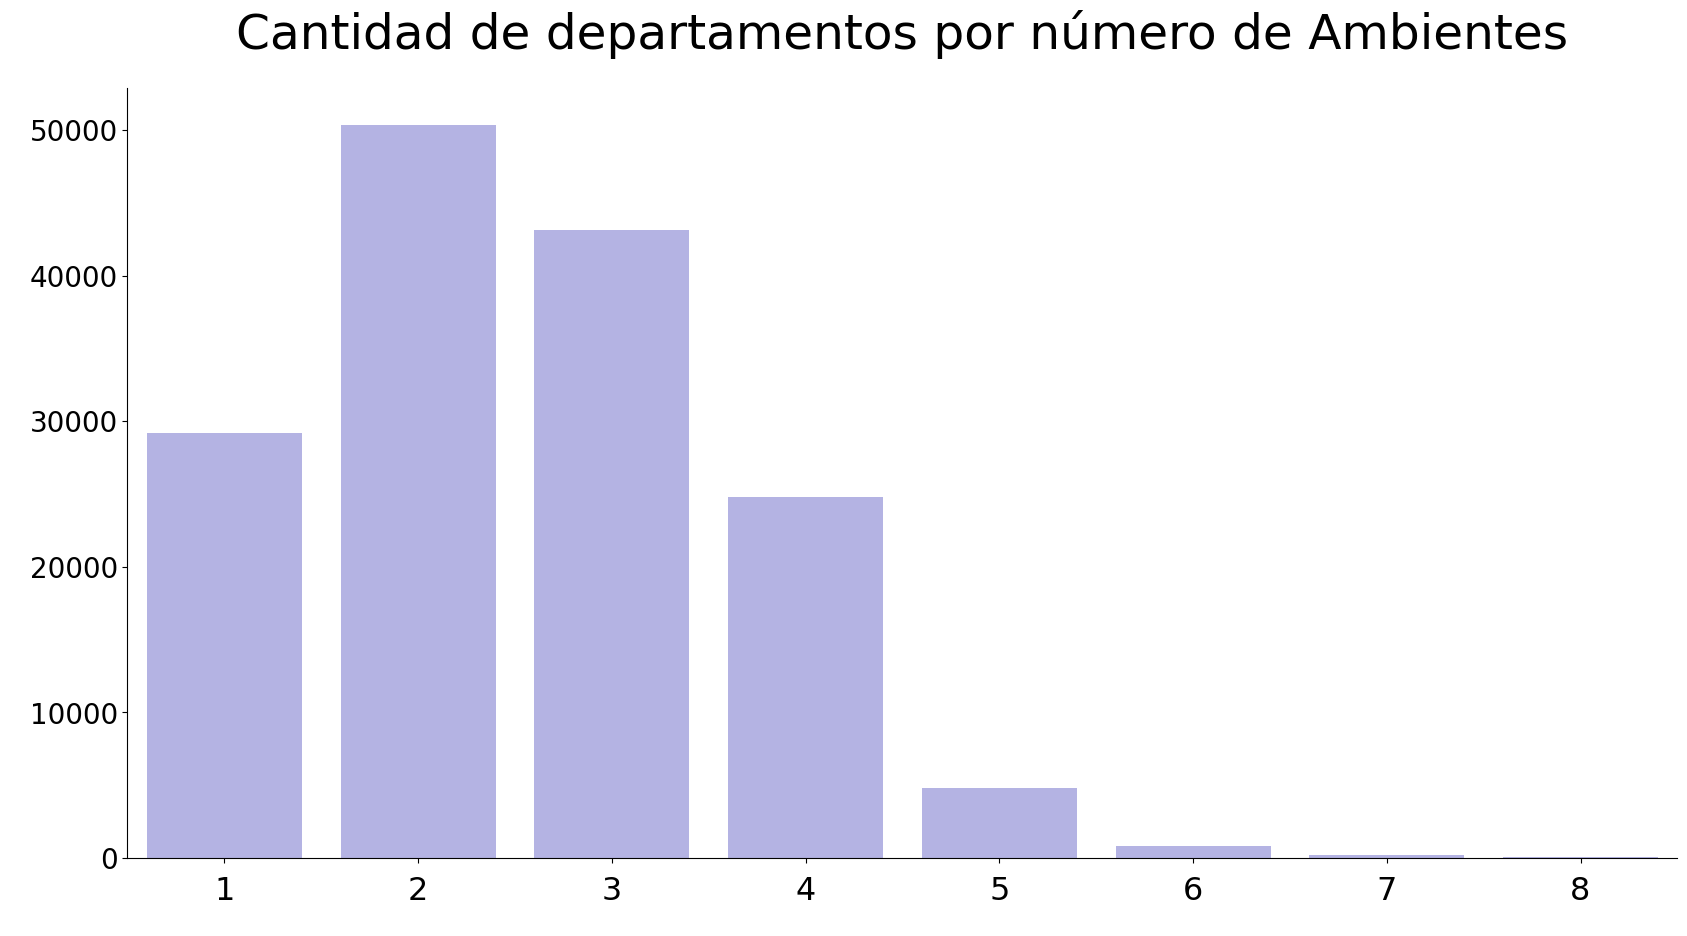

In [32]:
plt.figure(figsize=(20,10))
colores = [ '#ADABEB']

sns.countplot(data=data, 
              x = 'Ambientes',
              palette = colores)


plt.title('Cantidad de departamentos por número de Ambientes', y=1.04, fontdict={'size':35})
plt.xlabel(' ')
plt.xticks(fontsize=23, y=-0.01)
plt.ylabel(' ')
plt.yticks(fontsize=20)

sns.despine()
plt.show()

## Observaciones:

- Hay mayor cantidad de departamentos con 2 y 3 ambientes
- Hay 50384 departamentos con 2 ambientes (32.8%)
- Hay 43164 departamentos con 3 ambientes (28.1%)
- Hay solo 42 departamentos con 8 ambientes (0.02%)


### Trimestre

In [69]:
data['Trimestre'].value_counts()

SEGUNDO    135718
PRIMER      11917
TERCER       3150
CUARTO       2697
Name: Trimestre, dtype: int64

In [33]:
total_count_trimestre = data['Trimestre'].value_counts().sum()

In [34]:
porcentaje_trimestre = data['Trimestre'].value_counts()/total_count_trimestre*100 

In [35]:
porcentaje_trimestre 

SEGUNDO    88.426004
PRIMER      7.764428
TERCER      2.052358
CUARTO      1.757209
Name: Trimestre, dtype: float64

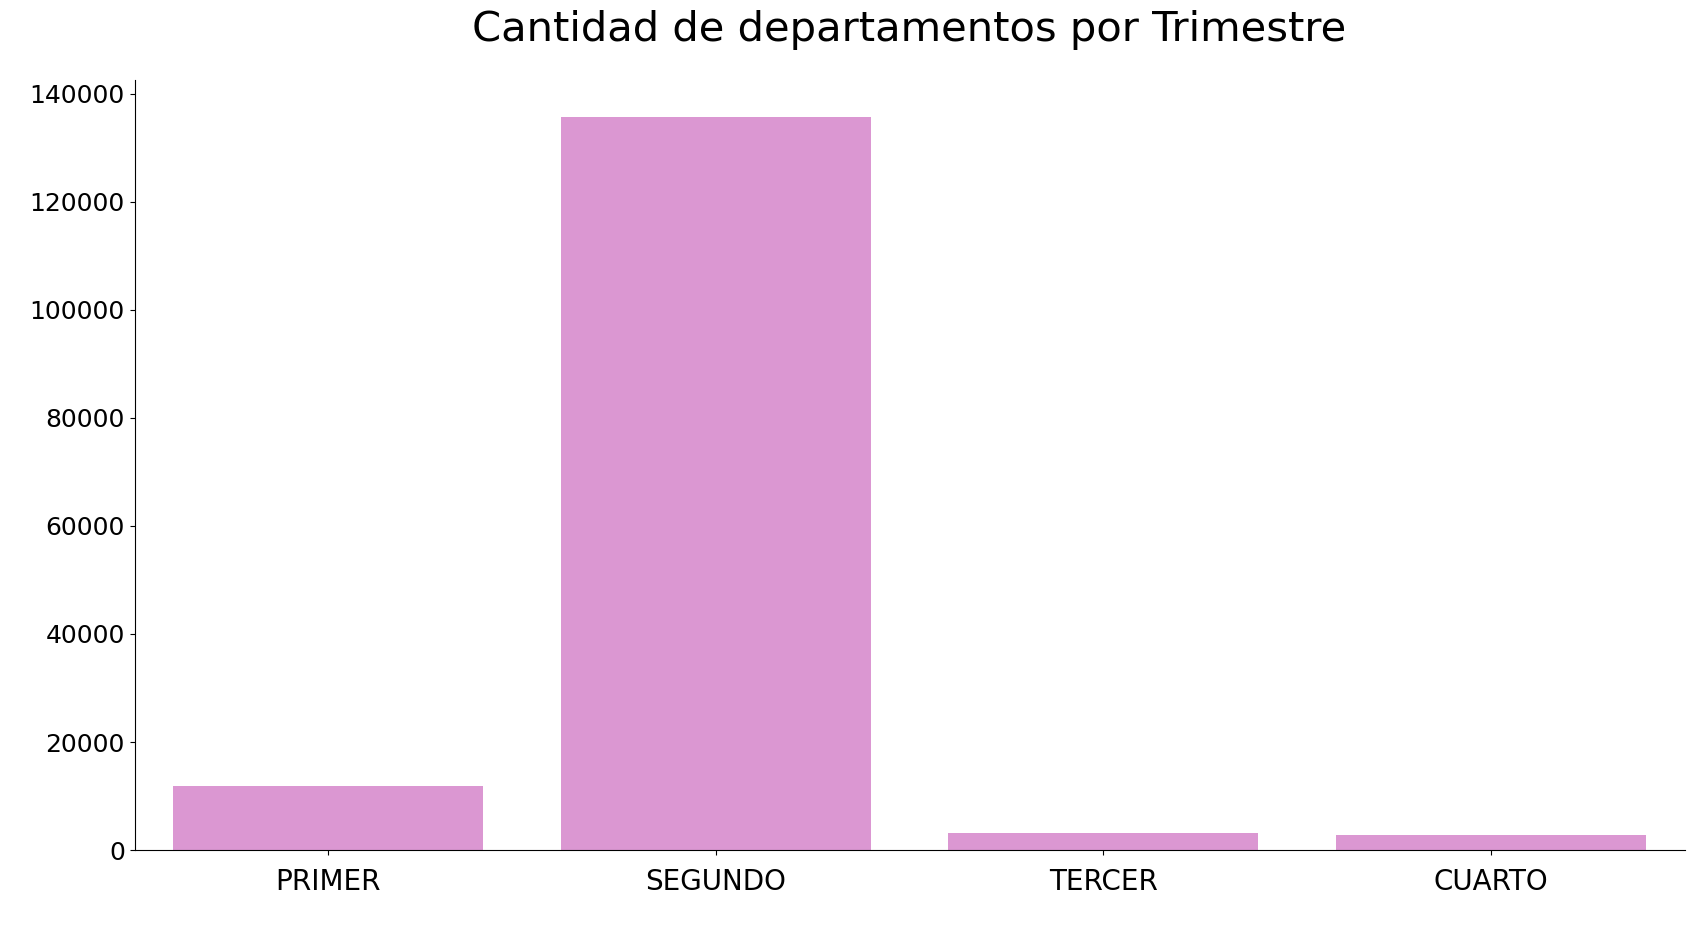

In [36]:
plt.figure(figsize=(20,10))
orden = ['PRIMER', 'SEGUNDO', 'TERCER', 'CUARTO']
colores = [ '#E78BDB' ]


sns.countplot(x = 'Trimestre',
           data = data,
          palette = colores,
          order = orden)

plt.title('Cantidad de departamentos por Trimestre', y=1.04, fontdict={'size':30})
plt.xlabel(' ')
plt.xticks(fontsize=20, y=-0.01)
plt.ylabel(' ')
plt.yticks(fontsize=18)

sns.despine()
plt.show()

## Observaciones:

- La mayor concentracion de departamentos (135718 unidades) es durante el segundo trimestre que representa el 88%
- La menor cantidad de departamentos a la venta fue durante el cuarto trimestre con 2697 unidades (1.75%)

## Variables Numéricas

### Reagrupo los valores de las variables en intervalos: 

### Pesos

In [58]:
len(data['Pesos'].unique())

25530

In [ ]:
data_intervalos = data

In [38]:
data_intervalos.loc[:, 'Rango_Pesos'] = '<5M'
data_intervalos.loc[(data_intervalos['Pesos']>= 5000000) & (data_intervalos['Pesos'] < 10000000), 'Rango_Pesos'] = '5M - 10M'
data_intervalos.loc[(data_intervalos['Pesos']>= 10000000) & (data_intervalos['Pesos'] < 20000000), 'Rango_Pesos'] = '10M - 20M'
data_intervalos.loc[(data_intervalos['Pesos']>= 20000000) & (data_intervalos['Pesos'] < 50000000), 'Rango_Pesos'] = '20M - 50M'
data_intervalos.loc[(data_intervalos['Pesos']>= 50000000) & (data_intervalos['Pesos'] < 100000000), 'Rango_Pesos'] = '50M - 100M'
data_intervalos.loc[(data_intervalos['Pesos']> 100000000), 'Rango_Pesos'] = '>100M'


In [39]:
data_intervalos['Rango_Pesos'].unique()

array(['<5M', '5M - 10M', '10M - 20M', '20M - 50M', '50M - 100M', '>100M'],
      dtype=object)

In [40]:
data_intervalos['Rango_Pesos'].value_counts()

5M - 10M      66157
10M - 20M     53196
20M - 50M     19904
<5M            9991
50M - 100M     3341
>100M           893
Name: Rango_Pesos, dtype: int64

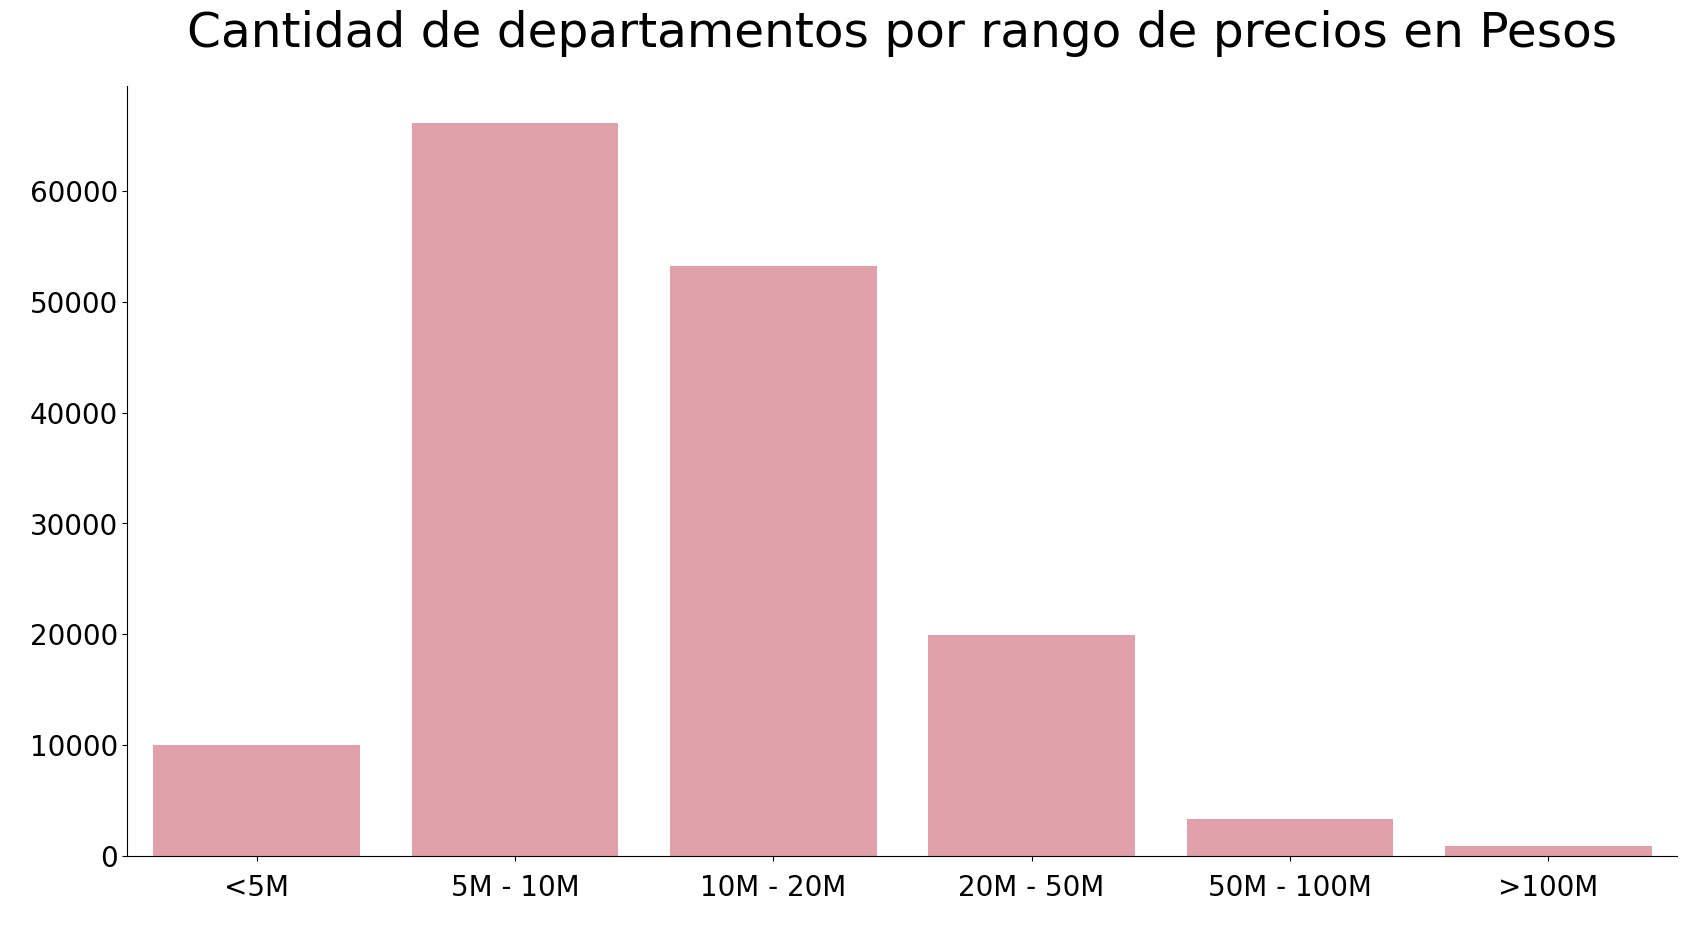

In [41]:
plt.figure(figsize=(20,10))
orden = ['<5M' ,'5M - 10M', '10M - 20M' , '20M - 50M', '50M - 100M', '>100M']
colores = ['#EA96A3']

sns.countplot(x='Rango_Pesos', data=data_intervalos, palette = colores,  order = orden)


plt.title('Cantidad de departamentos por rango de precios en Pesos', y=1.04, fontdict={'size':35})
plt.xlabel(' ')
plt.xticks(fontsize=20, y=-0.01)
plt.ylabel(' ')
plt.yticks(fontsize=20)

sns.despine()
plt.show()

## Observaciones:

- Hay aproximadamente 6500 departamentos en venta con un precio en pesos entre 5M y 10M 
- Seguido 5300 departamentos aprox entre 10M y 20M de pesos

###  Dólares

In [59]:
len(data['Dolares'].unique())

9869

In [42]:
data_intervalos.loc[:, 'Rango_Dolares'] = '<50K'
data_intervalos.loc[(data['Dolares']>=50000) & (data_intervalos['Dolares'] < 75000), 'Rango_Dolares'] = '50K - 75K'
data_intervalos.loc[(data['Dolares']>=75000) & (data_intervalos['Dolares'] < 100000), 'Rango_Dolares'] = '75K - 100K'
data_intervalos.loc[(data['Dolares']>=100000) & (data_intervalos['Dolares'] < 250000), 'Rango_Dolares'] = '100K - 250K'
data_intervalos.loc[(data['Dolares']>=250000) & (data_intervalos['Dolares'] < 500000), 'Rango_Dolares'] = '250K - 500K'
data_intervalos.loc[(data['Dolares']>=500000) & (data_intervalos['Dolares'] < 1000000), 'Rango_Dolares'] = '500K - 1M'
data_intervalos.loc[(data['Dolares']>=1000000), 'Rango_Dolares'] = '>1M'

In [43]:
data_intervalos['Rango_Dolares'].value_counts()

100K - 250K    85672
250K - 500K    25419
75K - 100K     23784
50K - 75K       8664
500K - 1M       6719
>1M             2151
<50K            1073
Name: Rango_Dolares, dtype: int64

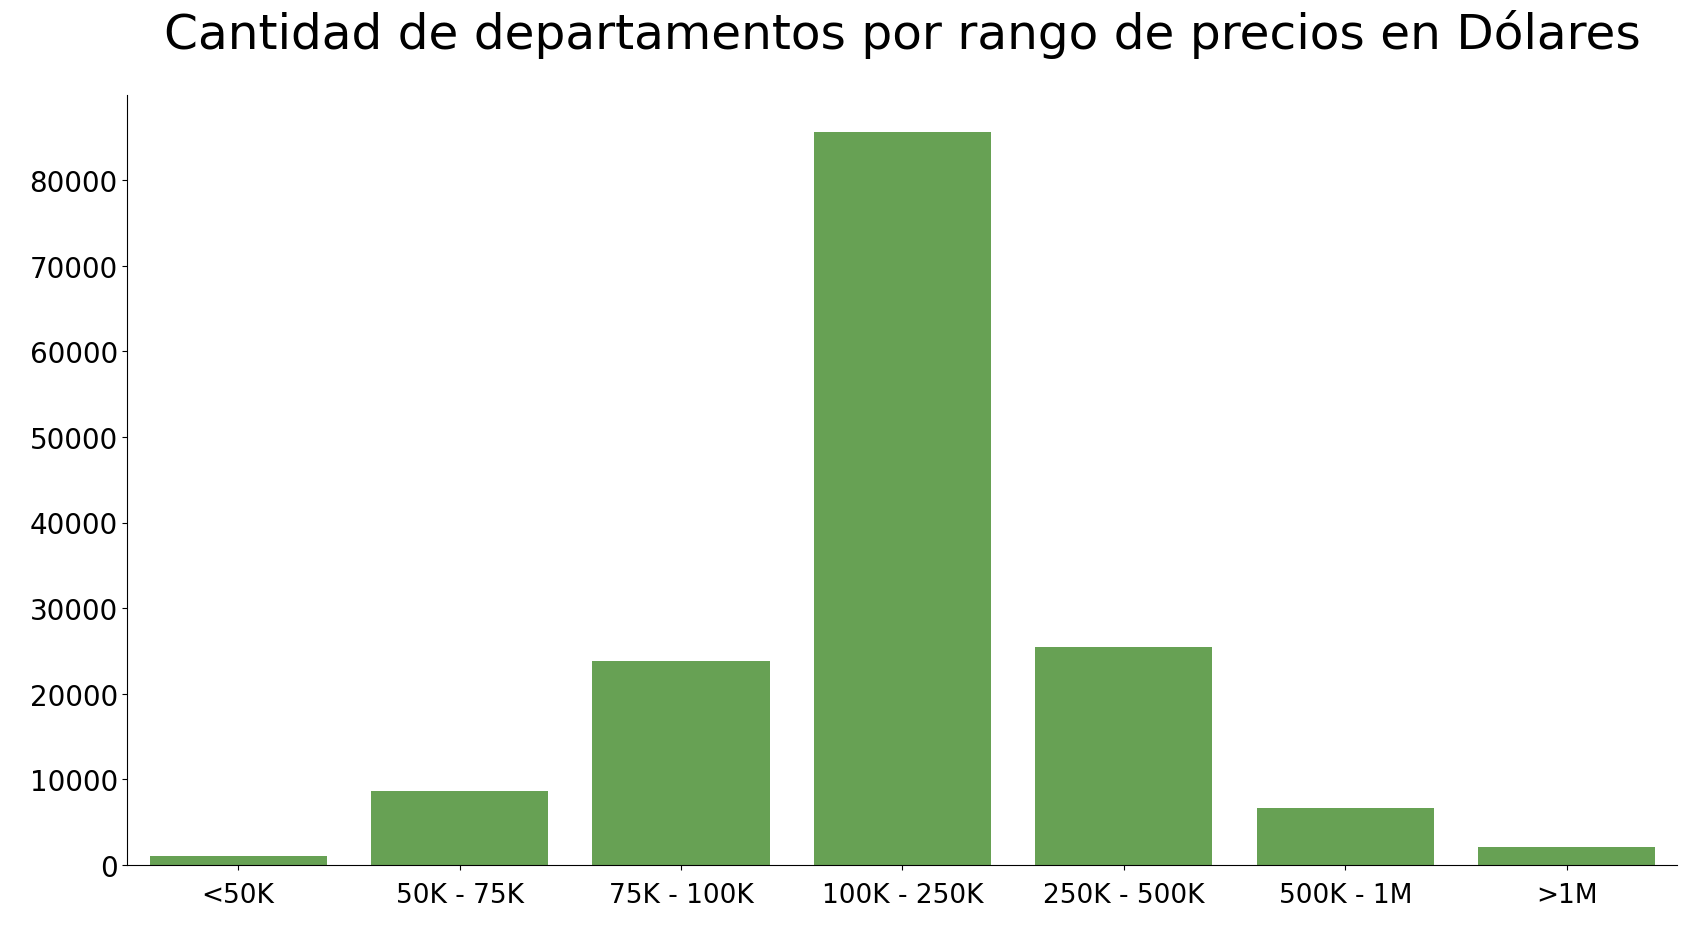

In [44]:
plt.figure(figsize=(20,10))
orden = ['<50K', '50K - 75K', '75K - 100K', '100K - 250K' ,  '250K - 500K' ,'500K - 1M', '>1M']
colores = ['#60AE47']

sns.countplot(x='Rango_Dolares', data=data_intervalos, palette=colores, order = orden)


plt.title('Cantidad de departamentos por rango de precios en Dólares', y=1.05, fontdict={'size':35})
plt.xlabel(' ')
plt.xticks(fontsize=19, y=-0.01)
plt.ylabel(' ')
plt.yticks(fontsize=20)

sns.despine()
plt.show()

## Observaciones:

- Hay una cantidad de aprox 8500 propiedades con con precios en dolares entre los 100K y 250K.
- Le siguen unas 2300 a 2500 propiedades con valores en dolares entre los 75K y 100K , y entre 250K y 500K respectivamente

### **PesosM2**

In [60]:
len(data['PesosM2'].unique())

58341

In [45]:
data_intervalos.loc[:, 'Rango_PesosM2'] = '<50K'
data_intervalos.loc[(data_intervalos['PesosM2']>=50000) & (data_intervalos['PesosM2'] < 100000), 'Rango_PesosM2'] = '50K - 100K'
data_intervalos.loc[(data_intervalos['PesosM2']>=100000) & (data_intervalos['PesosM2'] < 150000), 'Rango_PesosM2'] = '100K - 150K'
data_intervalos.loc[(data_intervalos['PesosM2']>=150000) & (data_intervalos['PesosM2'] < 200000), 'Rango_PesosM2'] = '150K - 200K'
data_intervalos.loc[(data_intervalos['PesosM2']>=200000) & (data_intervalos['PesosM2'] < 500000), 'Rango_PesosM2'] = '200K - 500K'
data_intervalos.loc[(data_intervalos['PesosM2']> 500000), 'Rango_PesosM2'] = '>500K'

In [46]:
data_intervalos['Rango_PesosM2'].value_counts()

200K - 500K    58672
150K - 200K    55781
100K - 150K    32370
50K - 100K      5606
>500K            859
<50K             194
Name: Rango_PesosM2, dtype: int64

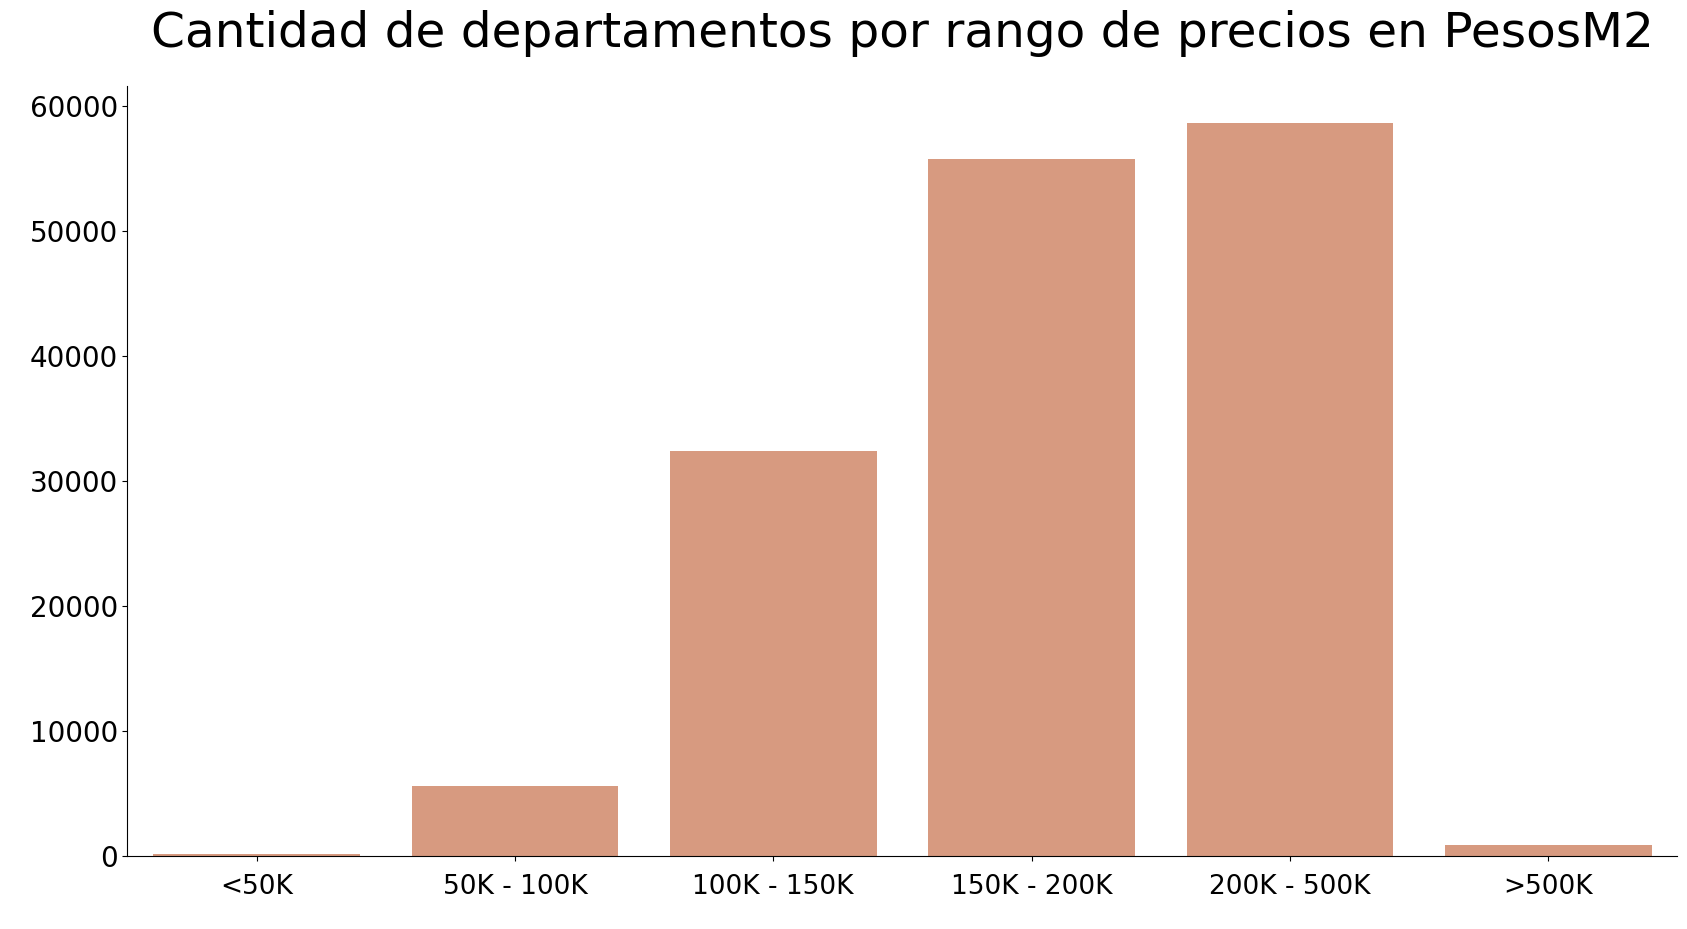

In [47]:
plt.figure(figsize=(20,10))
orden = ['<50K', '50K - 100K', '100K - 150K', '150K - 200K', '200K - 500K', '>500K']
colores = ['#E59471']

sns.countplot(x='Rango_PesosM2', data=data_intervalos,palette=colores, order = orden)

plt.title('Cantidad de departamentos por rango de precios en PesosM2', y=1.04, fontdict={'size':35})
plt.xlabel(' ')
plt.xticks(fontsize=19, y=-0.01)
plt.ylabel(' ')
plt.yticks(fontsize=20)

sns.despine()
plt.show()

## Observaciones:

- Hay una cantidad aproximada de 5800 departamentos en venta de entre 200K y 500K
- Seguido por 5300 propiedades con valores entre 150K y 200K pesosM2

### **DolaresM2**

In [61]:
len(data['DolaresM2'].unique())

5817

In [48]:
data_intervalos.loc[:, 'Rango_DolaresM2'] = '<1K'
data_intervalos.loc[(data['DolaresM2']>=1000) & (data_intervalos['DolaresM2'] < 2500), 'Rango_DolaresM2'] = '1K - 2,5K'
data_intervalos.loc[(data['DolaresM2']>=2500) & (data_intervalos['DolaresM2'] < 5000), 'Rango_DolaresM2'] = '2,5K - 5K'
data_intervalos.loc[(data['DolaresM2']>=5000) & (data_intervalos['DolaresM2'] < 10000), 'Rango_DolaresM2'] = '5K - 10K'
data_intervalos.loc[data['DolaresM2']>=10000 , 'Rango_DolaresM2'] = '>10K'

In [49]:
data_intervalos['Rango_DolaresM2'].value_counts()

2,5K - 5K    90917
1K - 2,5K    55981
5K - 10K      5663
<1K            749
>10K           172
Name: Rango_DolaresM2, dtype: int64

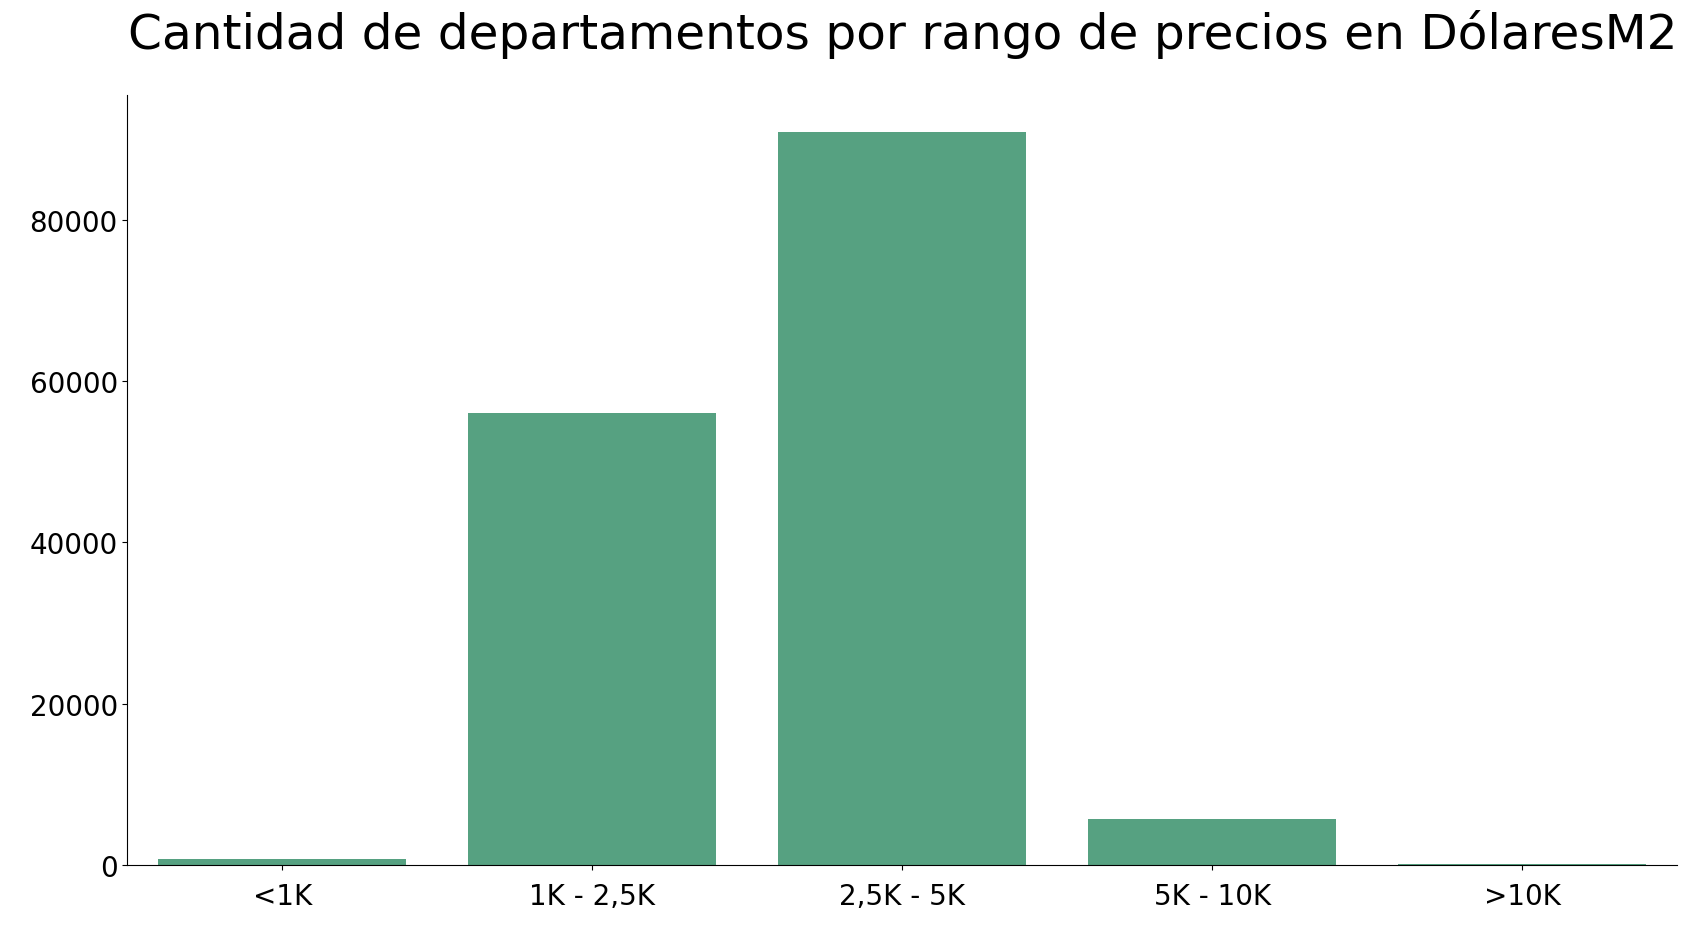

In [50]:
plt.figure(figsize=(20,10))
orden = ['<1K', '1K - 2,5K', '2,5K - 5K', '5K - 10K', '>10K']
colores = ['#49AE83']

sns.countplot(x='Rango_DolaresM2', data=data_intervalos, palette=colores, order = orden)


plt.title('Cantidad de departamentos por rango de precios en DólaresM2', y=1.05, fontdict={'size':35})
plt.xlabel(' ')
plt.xticks(fontsize=20, y=-0.01)
plt.ylabel(' ')
plt.yticks(fontsize=20)

sns.despine()
plt.show()

## Observaciones:

- Hay aproximadamente 90000 departamentos en venta con un valor de entre 2.5K y 5K dolaresM2
- Hay solamente 172 propiedades con un valor menor a 10K dolaresM2

## Exporto el dataset

In [51]:
ruta = 'C:/Users/Tamara/Documents/DATA ANALYTICS/Proyectos/Departamentos en Venta/departamentos-en-venta-2020-intervalos.csv'

data_intervalos.to_csv(ruta, index=False)